In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import style

In [2]:
dataDf=pd.read_excel("Data Visualization Assignmnet.xlsx")
dataDf.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


# Creating Year, Month, Weekday and Day Column

In [3]:
dataDf['YEAR']=dataDf['DATE'].dt.year
dataDf['MONTH']=dataDf['DATE'].dt.month
dataDf['DAY']=dataDf['DATE'].dt.day
dataDf['WEEKDAY']=dataDf['DATE'].dt.weekday

In [4]:
import calendar

In [5]:
dataDf['MONTH']=dataDf['MONTH'].apply(lambda x:calendar.month_abbr[x])
dataDf['WEEKDAY']=dataDf['WEEKDAY'].apply(lambda x:calendar.day_name[x])

In [6]:
dataDf.head()

,DATE,DESCRIPTION,UNIT,PLACE,YEAR,MONTH,DAY,WEEKDAY
0,2022-04-01,Beef,1,Kolenchery,2022,Apr,1,Friday
1,2022-04-01,Fish,1,Kolenchery,2022,Apr,1,Friday
2,2022-04-03,Beef,2,Tripunithura,2022,Apr,3,Sunday
3,2022-04-05,Prawns,1,Bangalore,2022,Apr,5,Tuesday
4,2022-04-06,Dates,1,Mangalore,2022,Apr,6,Wednesday


# Check to see that is there any missing values

In [7]:
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    int64         
 3   PLACE        103 non-null    object        
 4   YEAR         111 non-null    int64         
 5   MONTH        111 non-null    object        
 6   DAY          111 non-null    int64         
 7   WEEKDAY      111 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 7.1+ KB


1. So, as we can see that in <span style="color:blue">PLACE</span> coulm, there is some missin value.
2. Check how many missing value is there.

In [8]:
dataDf.PLACE.isnull().sum()

8

# Missing Value Imputation

In [9]:
dataDf['PLACE'].mode()

0    Malappuram
Name: PLACE, dtype: object

In [10]:
dataDf['PLACE'].fillna('Malappuram', inplace=True)

In [11]:
dataDf.PLACE.isnull().sum()

0

In [12]:
dataDf.DESCRIPTION.value_counts()

Beef          32
Prawns        31
Fish          13
Mango         10
Lemon          9
King Fish      7
Dates          3
Dryfruits      3
Dry fruits     2
Kadumanga      1
Name: DESCRIPTION, dtype: int64

As we can see that in <span style="color:blue">DESCRIPTION</span> column. 
There is 2 column with same name <span style="color:Green">DryFruits</span> but with differnet style. So, we have to treat them and this make more readable.

In [13]:
dataDf['DESCRIPTION'] = dataDf['DESCRIPTION'].str.replace(' ', '')

In [14]:
dataDf.DESCRIPTION.value_counts()

Beef         32
Prawns       31
Fish         13
Mango        10
Lemon         9
KingFish      7
Dryfruits     5
Dates         3
Kadumanga     1
Name: DESCRIPTION, dtype: int64

# VISUALIZATION

# The food prefer most

# According Month

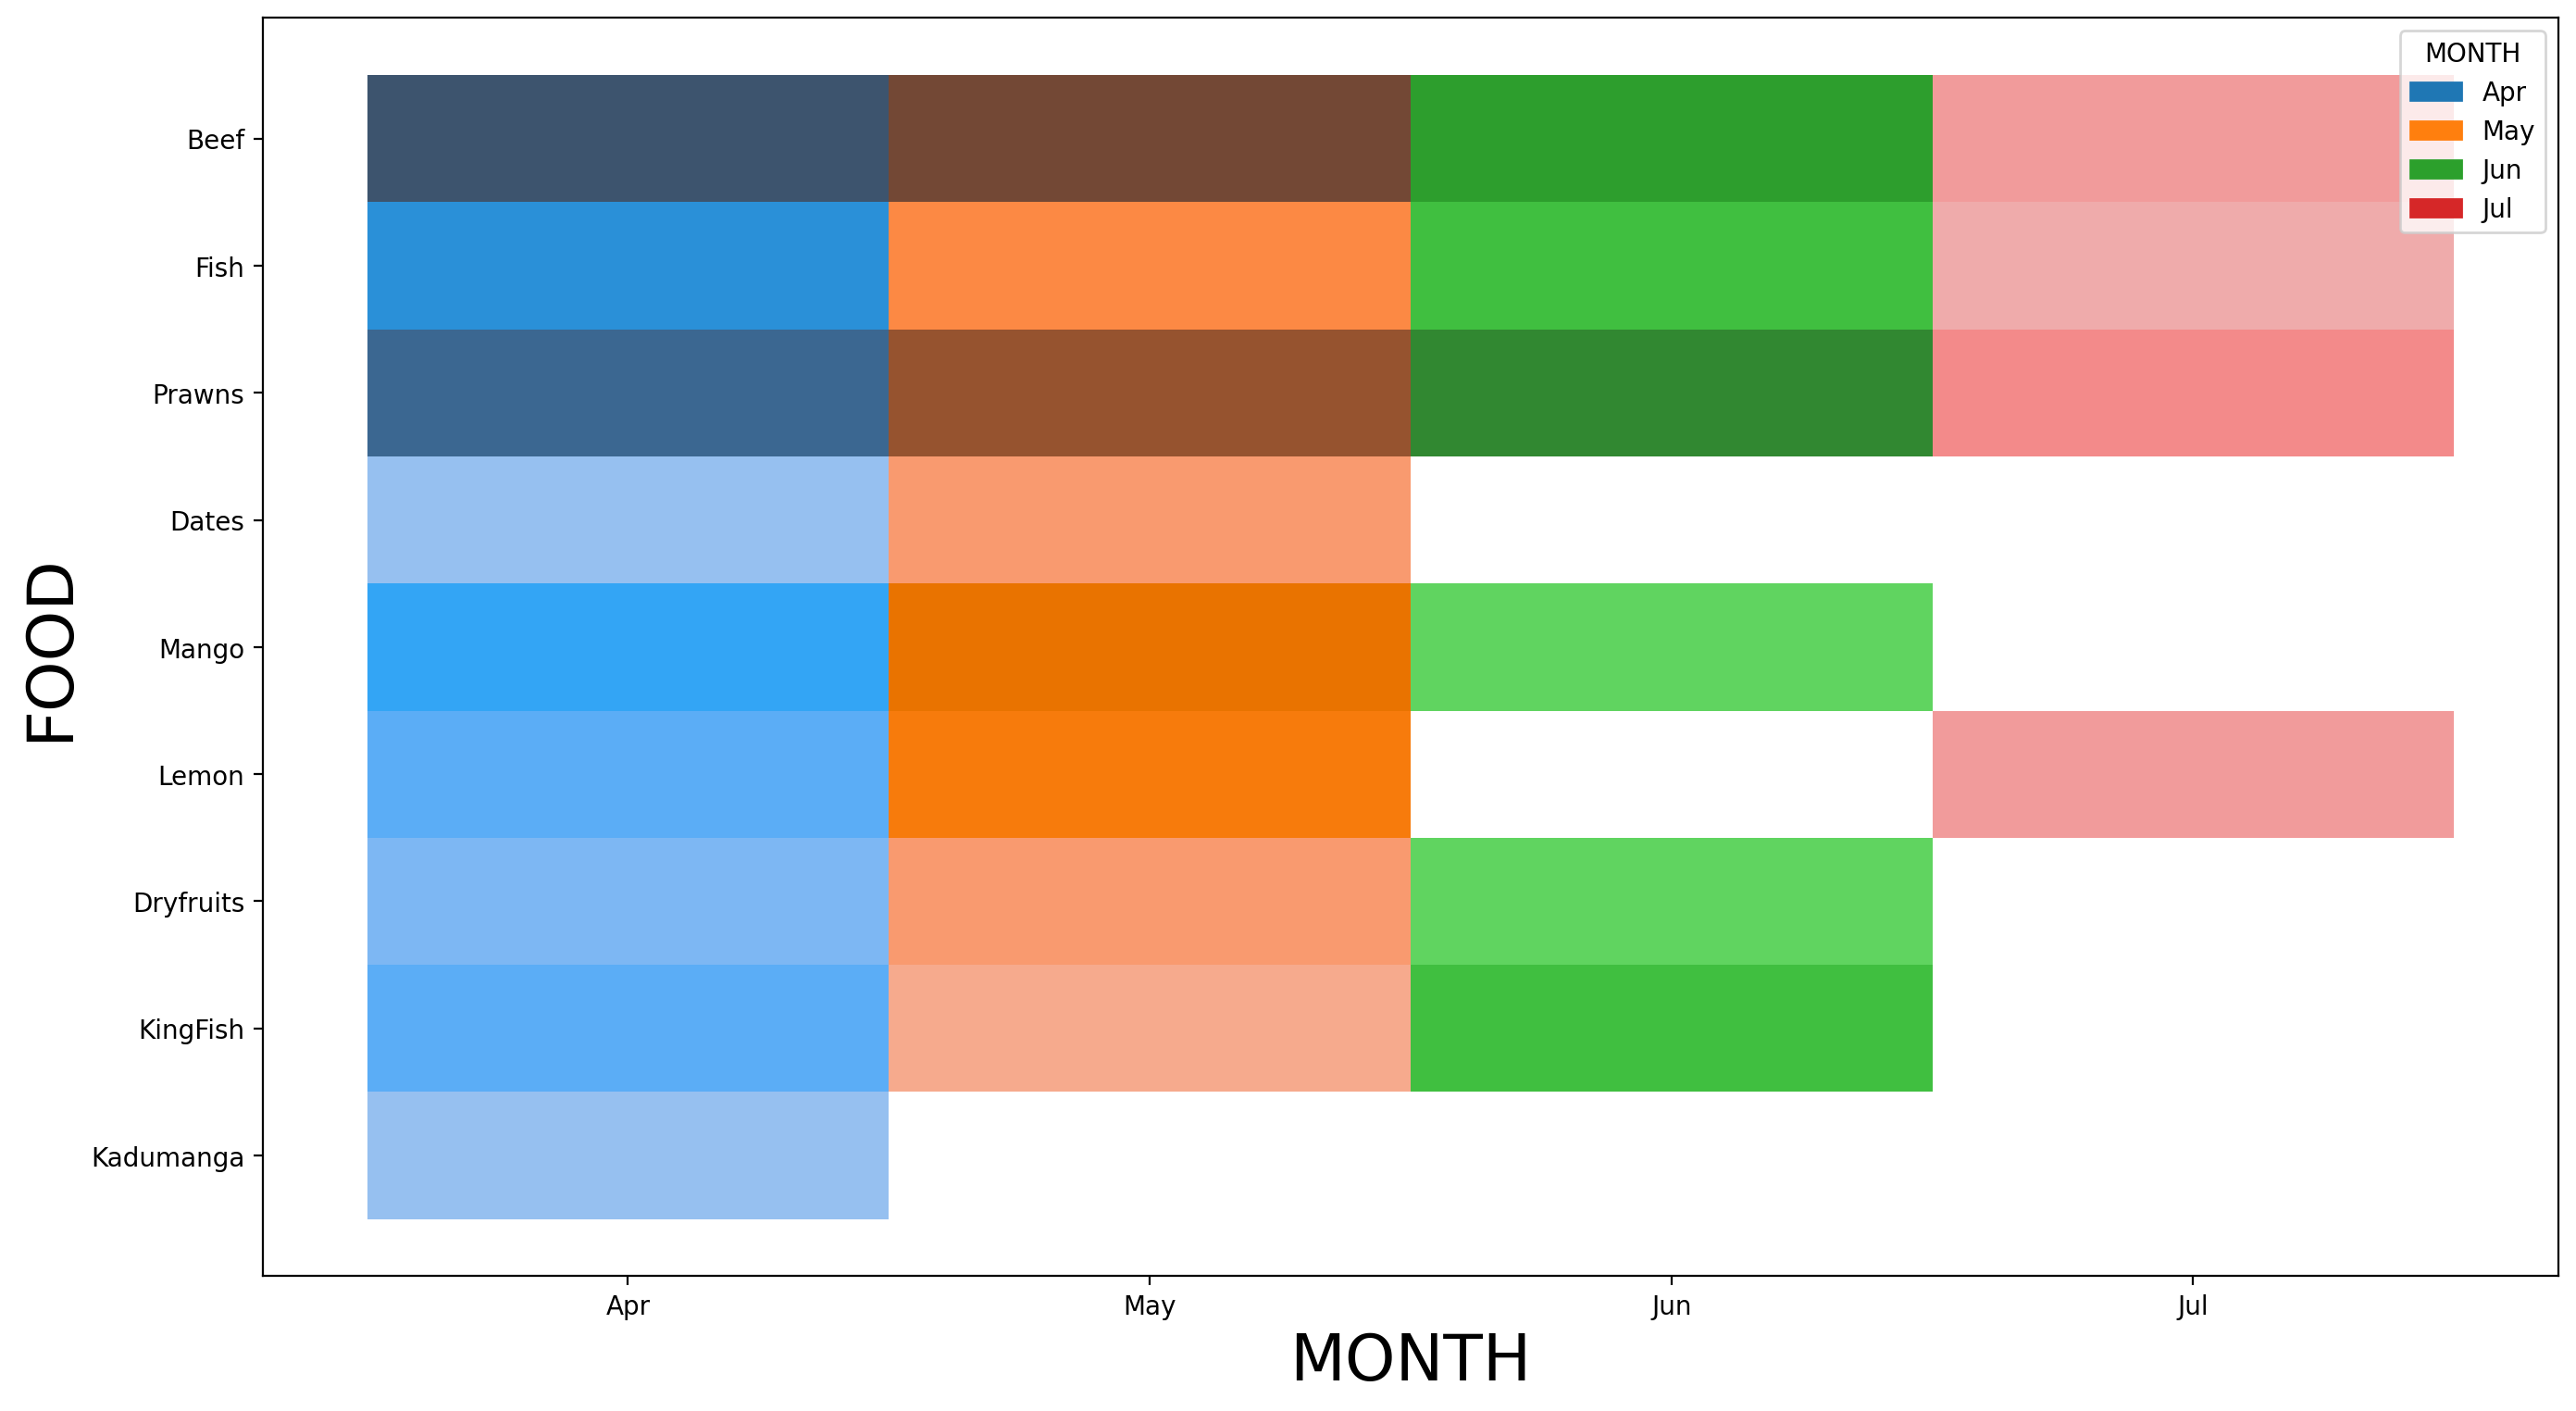

In [15]:
plt.figure(figsize=(16,9),dpi=200)
sns.histplot(data=dataDf, y='DESCRIPTION',x='MONTH',hue='MONTH')
plt.ylabel('FOOD',fontsize=25)
plt.xlabel('MONTH',fontsize=25)
plt.show()

# Which month have high demand food

<div style="font-size: 25px">
<span style="color:red">According Month</span>
</div>

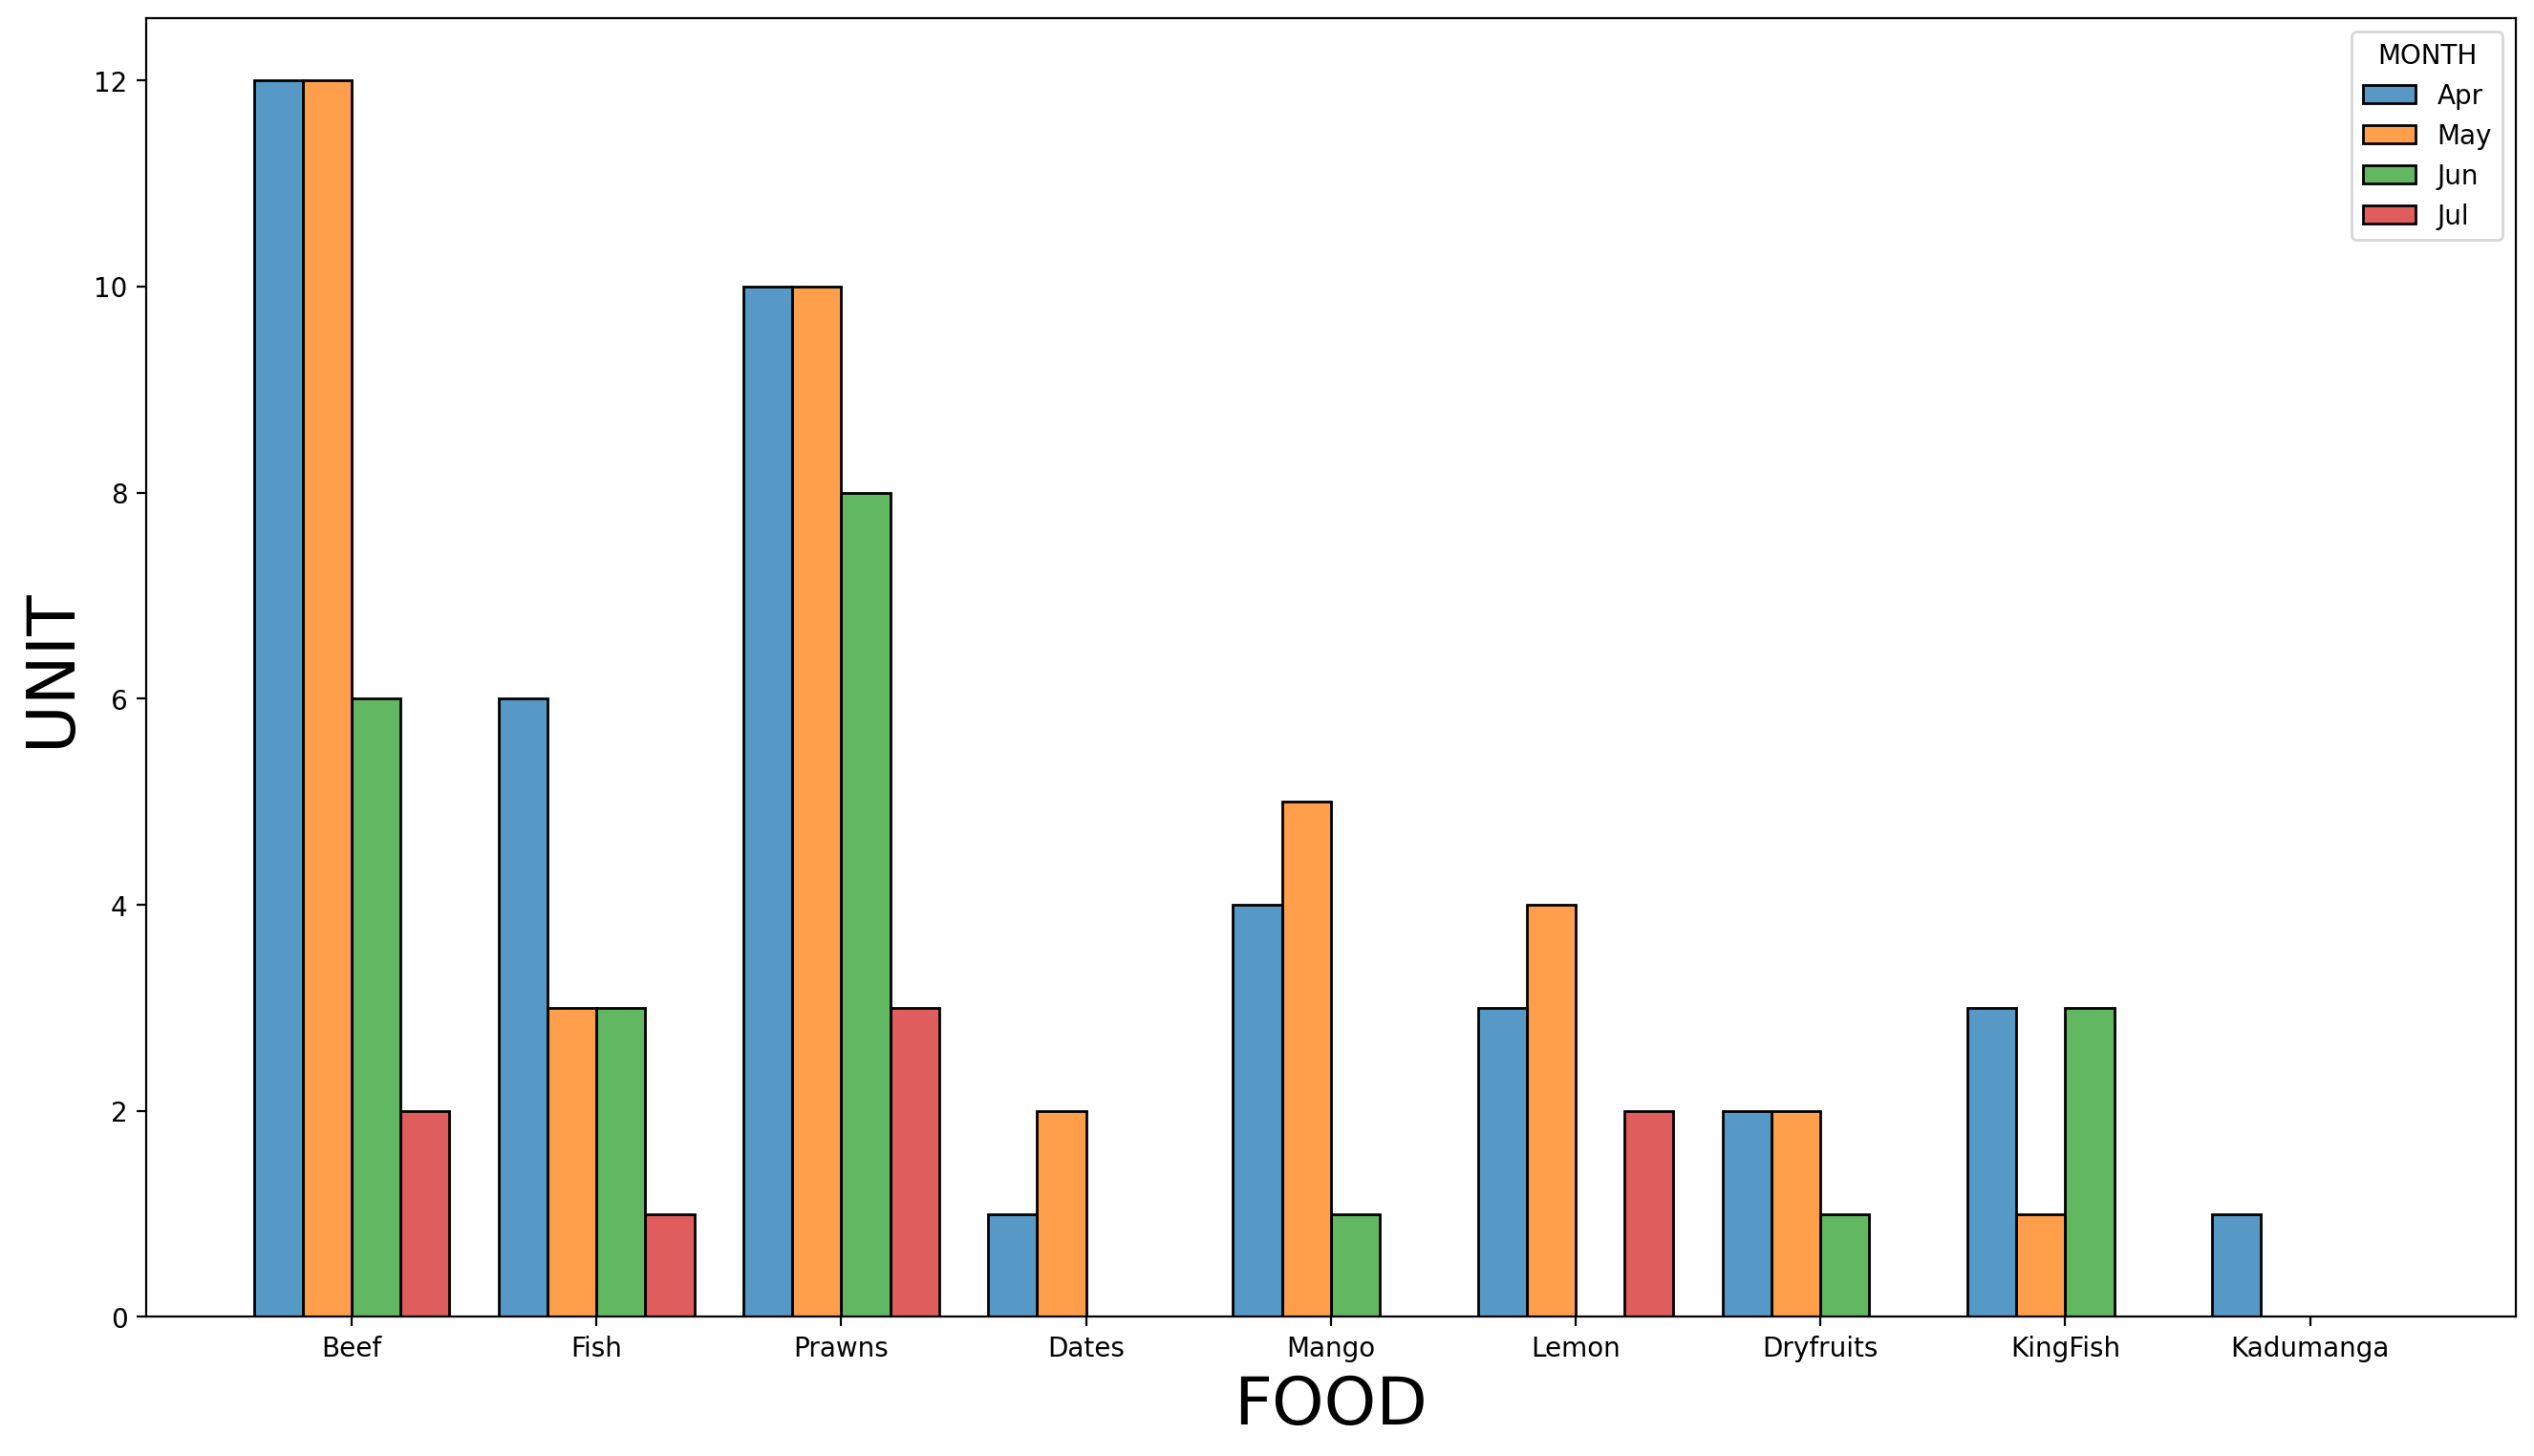

In [16]:
plt.figure(figsize=(16,9),dpi=200)
sns.histplot(data=dataDf,x='DESCRIPTION',hue='MONTH', multiple="dodge", shrink=.8)
plt.ylabel('UNIT',fontsize=25)
plt.xlabel('FOOD',fontsize=25)
plt.show()

<div style="font-size: 25px">
<span style="color:red">According Weekday</span>
</div>

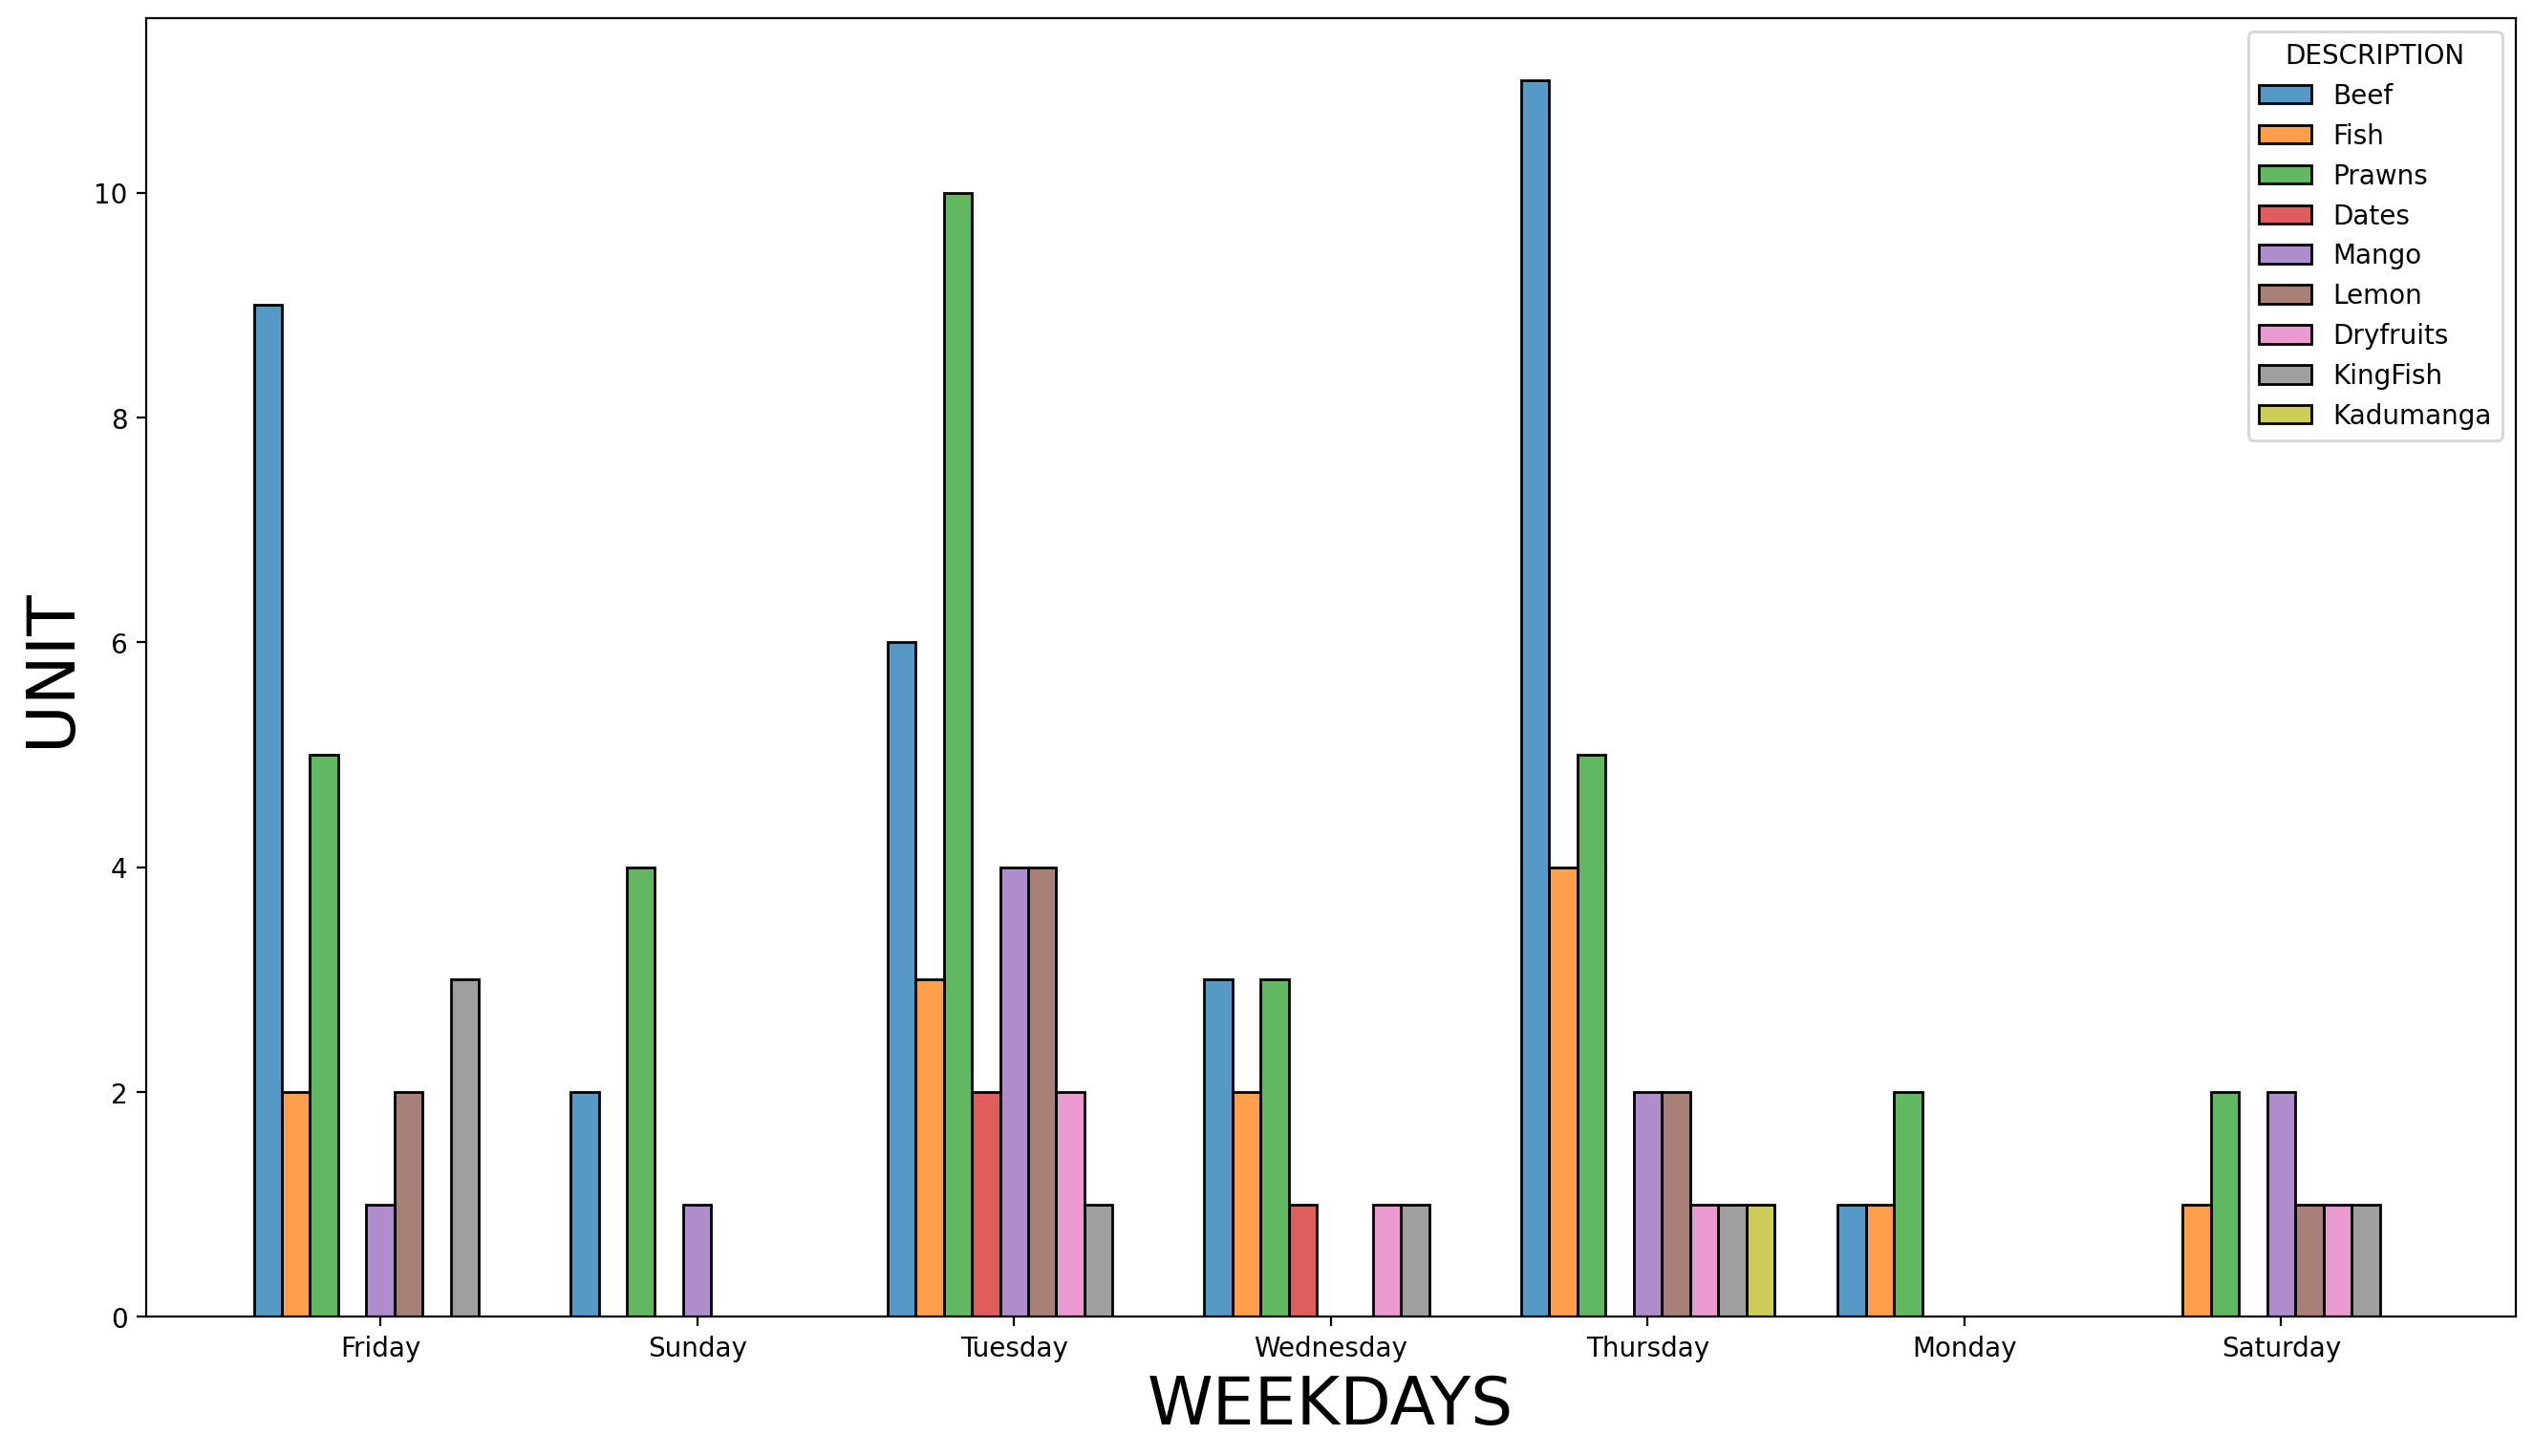

In [17]:
plt.figure(figsize=(16,9),dpi=200)
sns.histplot(data=dataDf, hue='DESCRIPTION',x='WEEKDAY', multiple="dodge", shrink=.8)
plt.ylabel('UNIT',fontsize=25)
plt.xlabel('WEEKDAYS',fontsize=25)
plt.show()

<div style="font-size: 25px">
<span style="color:red">According Place</span>
</div>

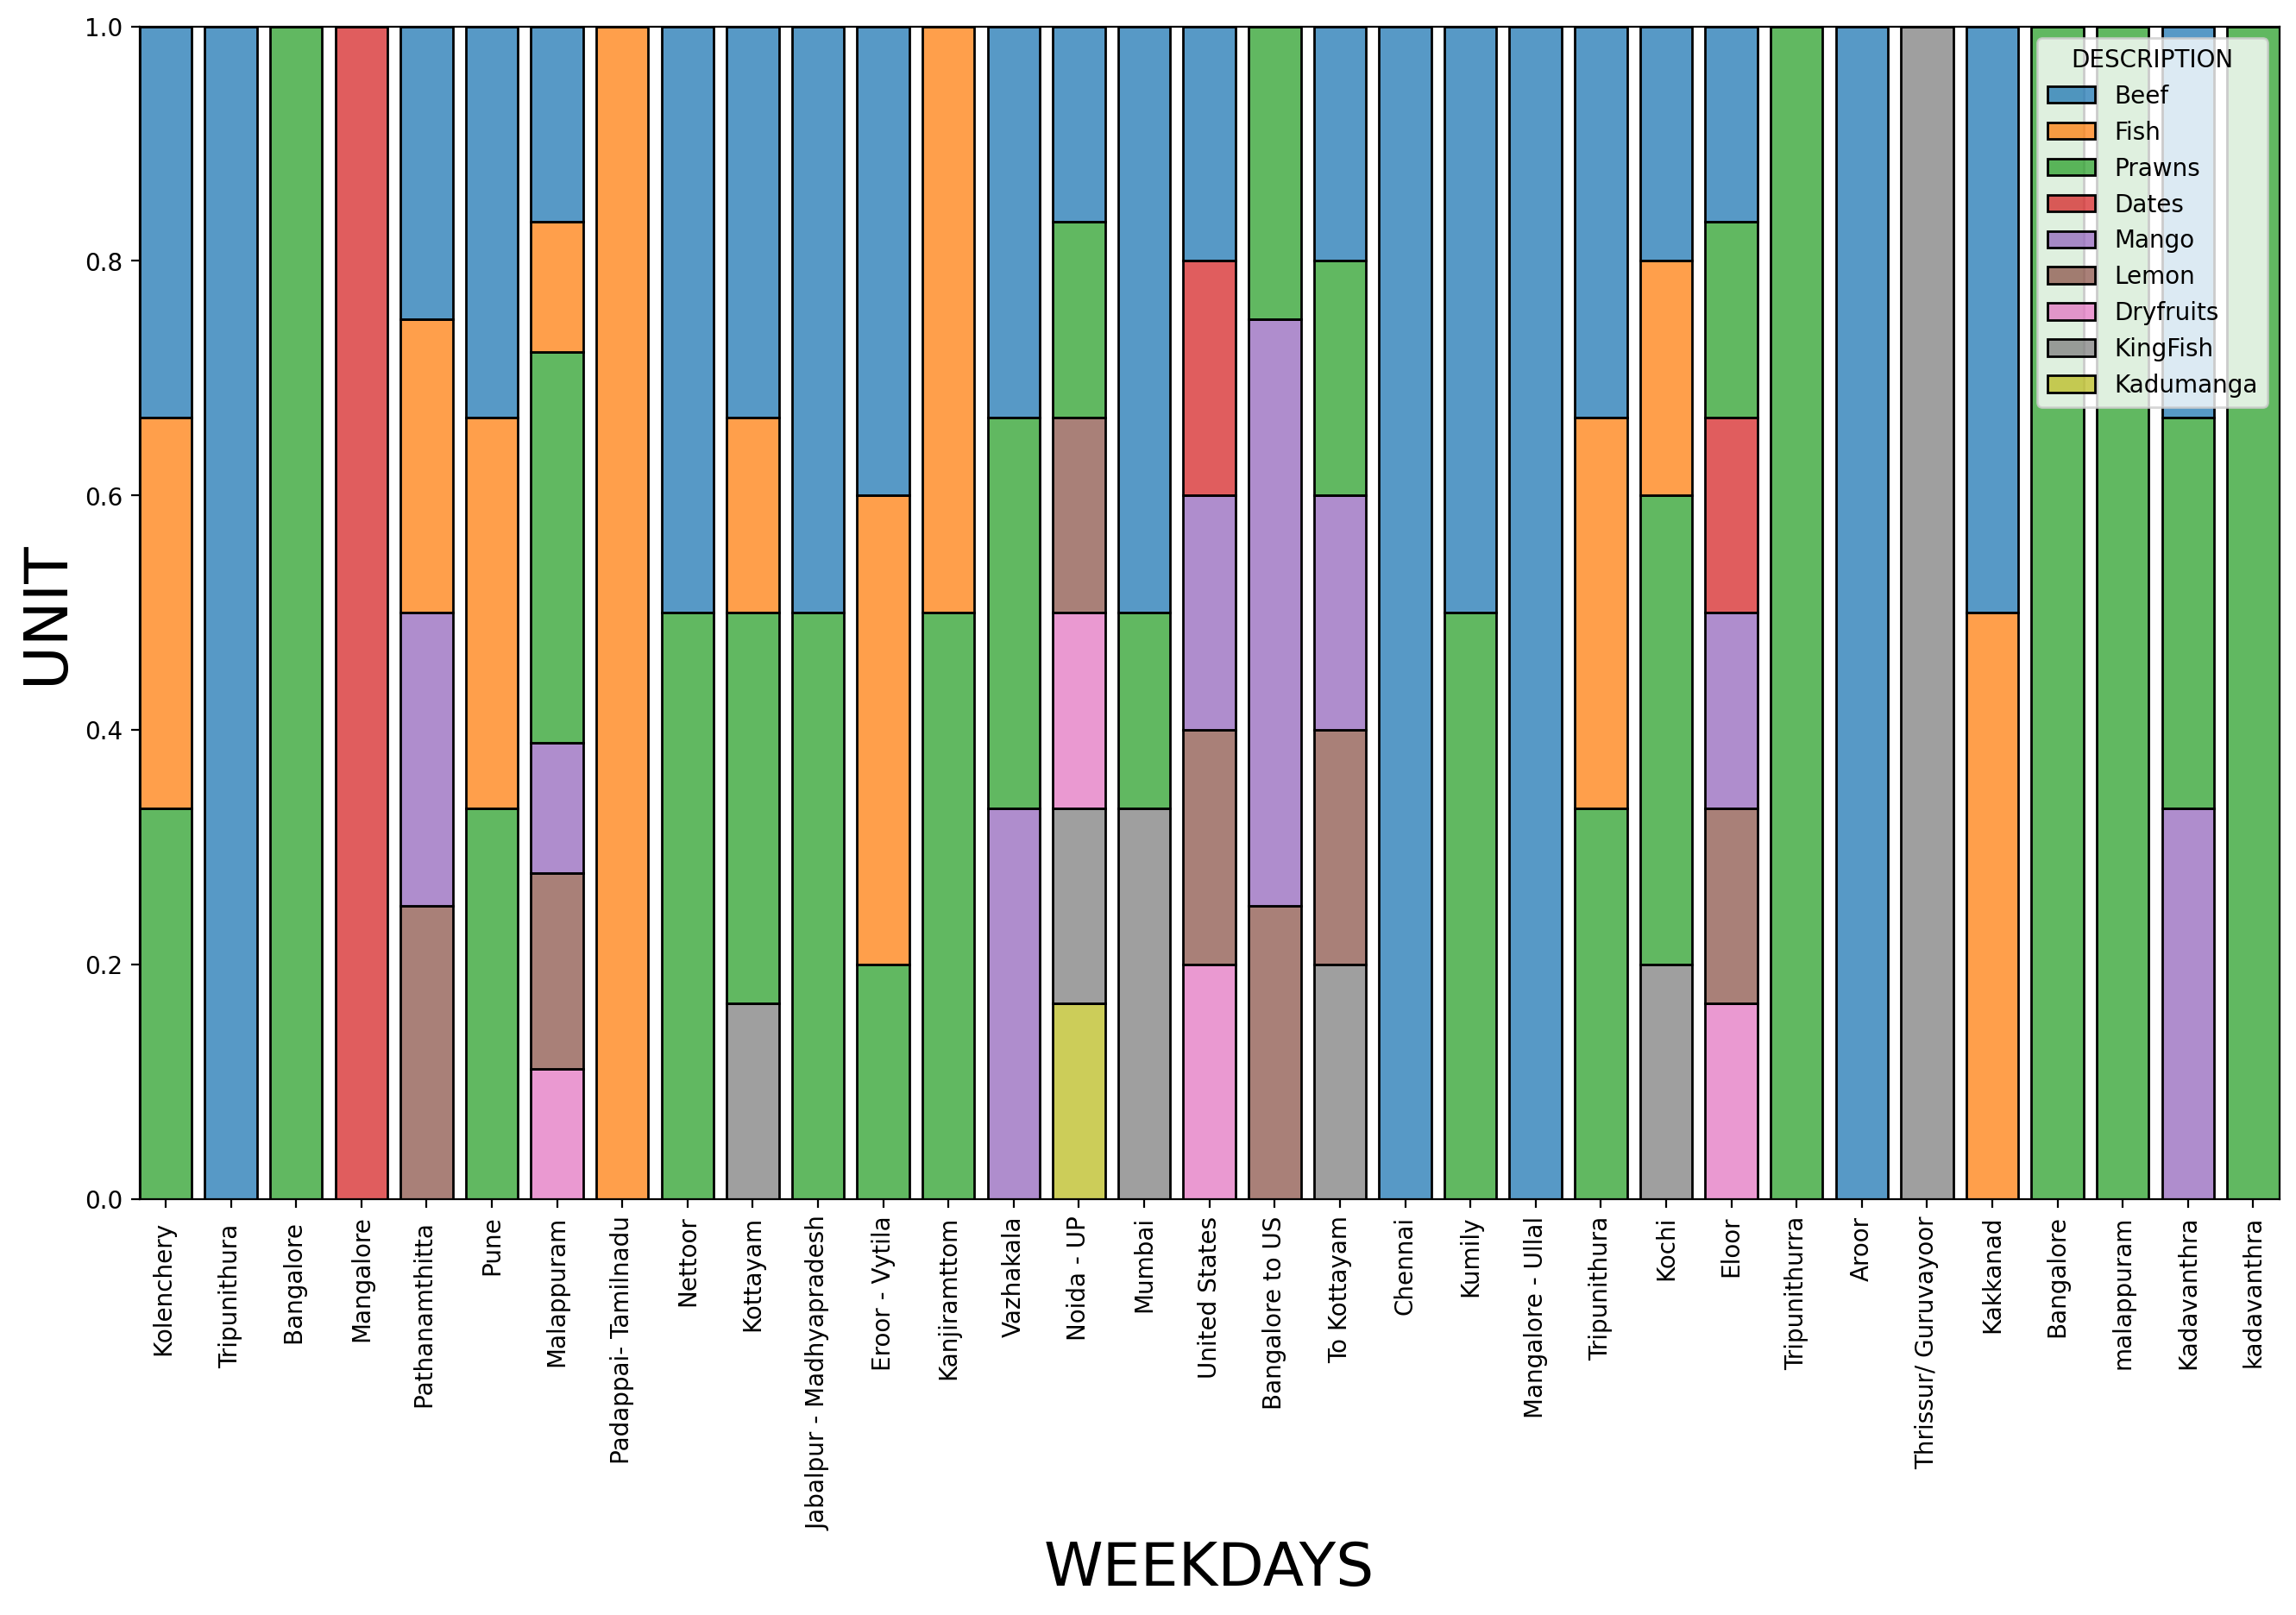

In [18]:
plt.figure(figsize=(16,9),dpi=200)
sns.histplot(data=dataDf, hue='DESCRIPTION',x='PLACE', multiple="fill", shrink=.8)
plt.ylabel('UNIT',fontsize=25)
plt.xlabel('WEEKDAYS',fontsize=25)
plt.xticks(rotation = 90)
plt.show()

# Quantity of food per Month

<div style="font-size: 25px">
<span style="color:blue">Bar Chart</span>
</div>

In [19]:
groupedvalues = dataDf.groupby('MONTH').sum().reset_index()

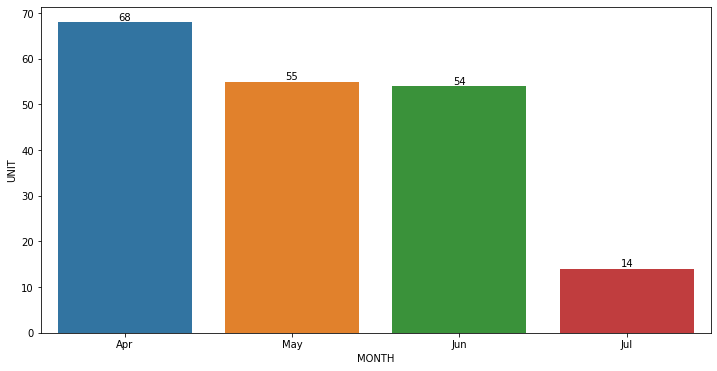

In [20]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='MONTH', y='UNIT', data=groupedvalues, errwidth=0, order=dataDf.MONTH.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

<div style="font-size: 25px">
<span style="color:blue">Pei Chart</span>
</div>

In [21]:
x=dataDf.groupby("MONTH")['UNIT'].sum()
x

MONTH
Apr    68
Jul    14
Jun    54
May    55
Name: UNIT, dtype: int64

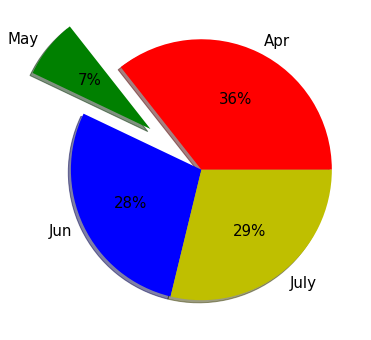

In [22]:
plt.figure(figsize=(12,6))
textprop={'fontsize':15}
plt.pie(x, autopct="%1.0f%%", labels=['Apr','May','Jun','July'], explode=[0.0,0.5,0.0,0.0], 
       colors=['r','g','b','y'], shadow=True, textprops=textprop)
plt.show()